### [석유시추](https://school.programmers.co.kr/learn/courses/30/lessons/250136?language=python3)

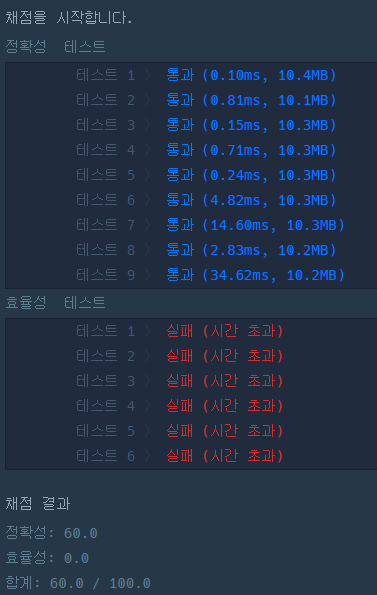

In [ ]:
from collections import deque

def solution(land):

    # history
    my, mx = len(land), len(land[0])
    history = [[False] * mx for _ in range(my)]
    
    # answers
    answers = [0] * len(land[0])
    
    # define Q
    queue = deque([(0, 0)])
    directions = [(1,0), (0, 1), (-1,0), (0, -1)]
    
    while queue:
        y, x = queue.popleft()
        if not history[y][x]:
            history[y][x] = True
            
            if not land[y][x]: # 기름이 없는 곳
                for dy, dx in directions:
                    ny, nx = y+dy, x+dx
                    if 0 <= ny < my and 0 <= nx < mx and not land[ny][nx] and not history[ny][nx]:
                        queue.append((ny, nx))
            else : # 기름이 있는 곳
                score = 1
                sub_queue = deque([(y, x)])
                sub_history = [x]
                while sub_queue:
                    y, x = sub_queue.popleft()
                    for dy, dx in directions:
                        ny, nx = y+dy, x+dx
                        if 0 <= ny < my and 0 <= nx < mx and land[ny][nx] and not history[ny][nx]:
                            score += 1
                            history[ny][nx] = True
                            sub_history.append(nx)
                            sub_queue.append((ny, nx))
                sub_history = list(set(sub_history))
                for s in sub_history:
                    answers[s] += score
        
        if not queue:
            extras = [(e, i.index(False)) for e, i in enumerate(history) if not all(i)]
            if extras:
                queue.append(extras[0])
    return max(answers)
                        

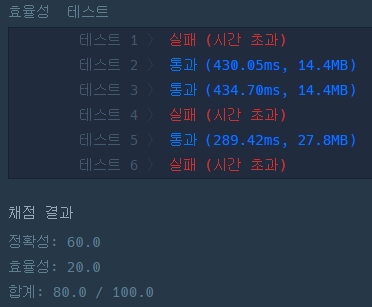

In [ ]:
from collections import deque

def solution(land):

    # history
    my, mx = len(land), len(land[0])
    history = [[False] * mx for _ in range(my)]
    
    # answers
    answers = [0] * len(land[0])
    
    # define Q
    queue = deque([(0, 0)])
    directions = [(1,0), (0, 1), (-1,0), (0, -1)]
    
    while queue:
        y, x = queue.popleft()
        if not history[y][x]:
            history[y][x] = True
            
            if not land[y][x]: # 기름이 없는 곳
                for dy, dx in directions:
                    ny, nx = y+dy, x+dx
                    if 0 <= ny < my and 0 <= nx < mx and not land[ny][nx] and not history[ny][nx]:
                        queue.append((ny, nx))
            else : # 기름이 있는 곳
                score = 1
                sub_queue = deque([(y, x)])
                sub_history = [x]
                while sub_queue:
                    y, x = sub_queue.popleft()
                    for dy, dx in directions:
                        ny, nx = y+dy, x+dx
                        if 0 <= ny < my and 0 <= nx < mx and not history[ny][nx]:
                            if land[ny][nx]:
                                score += 1
                                history[ny][nx] = True
                                sub_history.append(nx)
                                sub_queue.append((ny, nx))
                            else :
                                queue.append((ny, nx))
                sub_history = list(set(sub_history))
                for s in sub_history:
                    answers[s] += score
        
        if not queue:
            extras = [(e, i.index(False)) for e, i in enumerate(history) if not all(i)]
            if extras:
                queue += extras
    return max(answers)
                        

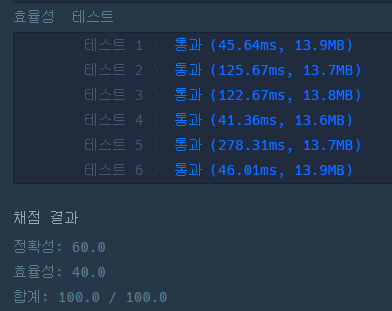

In [ ]:
from collections import deque

def solution(land):
    my, mx = len(land), len(land[0])
    history = [[False] * mx for _ in range(my)]
    answers = [0] * mx
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    
    for i in range(my):
        for j in range(mx):
            if land[i][j] and not history[i][j]:
                score = 0
                queue = deque([(i, j)])
                x_positions = set()
                
                while queue:
                    y, x = queue.popleft()
                    if history[y][x]:
                        continue
                    history[y][x] = True
                    score += 1
                    x_positions.add(x)
                    
                    for dy, dx in directions:
                        ny, nx = y + dy, x + dx
                        if 0 <= ny < my and 0 <= nx < mx and not history[ny][nx] and land[ny][nx]:
                            queue.append((ny, nx))
                
                for x in x_positions:
                    answers[x] += score
                    
    return max(answers)


- other person's code  
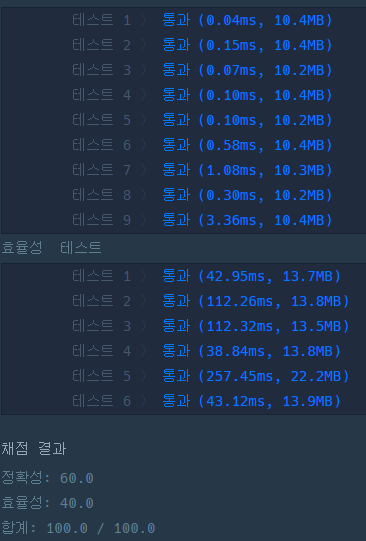

In [ ]:
def solution(land):
    n, m = len(land), len(land[0])
    visited = [[True]*m for _ in range(n)]
    delta = [(1,0),(-1,0),(0,1),(0,-1)]
    oil_cnt = [0]*m
    for i in range(n):
        for j in range(m):
            if land[i][j] and visited[i][j]:
                visited[i][j] = False
                s = [(i,j)]
                col = set()
                oil = 0
                while s:
                    x, y = s.pop()
                    col.add(y)
                    oil += 1
                    for dx, dy in delta:
                        X, Y = x+dx, y+dy
                        if 0<=X<n and 0<=Y<m and land[X][Y] and visited[X][Y]:
                            visited[X][Y] = False
                            s.append((X,Y))
                for y in col:
                    oil_cnt[y] += oil
    return max(oil_cnt)

In [63]:
land = [[0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 1, 1]]
solution(land)

9

In [51]:
all([False, True])

False

### [순위검색](https://school.programmers.co.kr/learn/courses/30/lessons/72412)

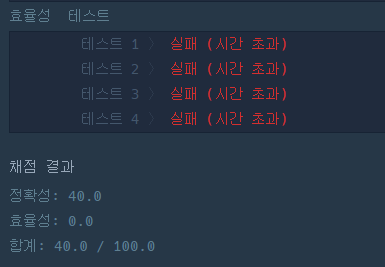

- 정확도는 다 맞췄지만 효율성이 문제

In [13]:
def solution(info, query):
    info = [x.split() for x in info]
    query = [y.replace('and ', '').split(' ') for y in query]
    answers = []
    for q in query:
        sub = info.copy()
        for i, t in enumerate(q):
            if t == '-':
                continue
            if i == 4:
                sub = [k for k in sub if int(k[i]) >= int(t)]
            else :
                sub = [k for k in sub if k[i] == t]
        answers.append(len(sub))
    return answers

- 각 유저별로 해당될 수 있는 모든 경우의 수를 key로, 스코어를 value 값으로 가지는 dict를 만들고 추후에 이를 고려해 카운팅

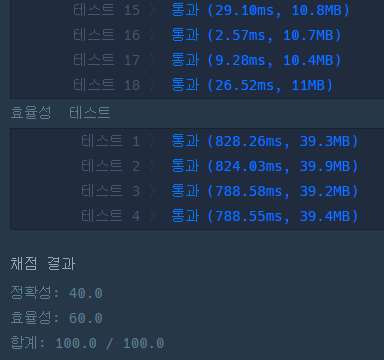

In [15]:
from collections import defaultdict
from itertools import combinations

def solution(info, query):

    db = defaultdict(list)

    # info를 각 키 조합에 맞춰 db에 저장
    for inf in info:
        inf_split = inf.split()
        key_parts = inf_split[:-1]
        score = int(inf_split[-1])
        for n in range(5):
            for comb in combinations(range(4), n):
                temp_key = key_parts.copy()
                for c in comb:
                    temp_key[c] = '-'
                db[tuple(temp_key)].append(score)

    # 각 키의 점수 리스트를 정렬
    for key in db:
        db[key].sort()

    results = []
    for q in query:
        q_split = q.replace('and ', '').split()
        key = tuple(q_split[:-1])
        target_score = int(q_split[-1])

        if key in db:
            scores = db[key]
            # 이진 탐색을 이용해 target_score 이상의 점수 개수 계산
            left, right = 0, len(scores)
            while left < right:
                mid = (left + right) // 2
                if scores[mid] >= target_score:
                    right = mid
                else:
                    left = mid + 1
            results.append(len(scores) - left)
        else:
            results.append(0)

    return results


- 다른 사람의 풀이 : ???  
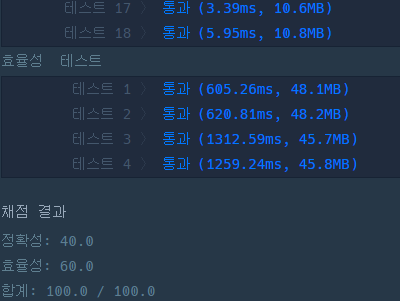

In [17]:
from functools import reduce
from collections import defaultdict
from bisect import insort, bisect_left

def solution(info, query):
    table = {"c": 3, "j": 5, "p": 6, "b": 6, "f": 5, "s": 6, "-": 0}
    conv = lambda l, t: (reduce(lambda a, k: (a << 3) + t(table[k[0]]), l[:-1], 0), int(l[-1]))
    info = list(map(lambda s: conv(s.split(" "), lambda x: 7 - x), info))
    query = list(map(lambda s: conv([c for c in s.split(" ") if c != "and"], lambda x: x), query))
    d = defaultdict(list)
    for k, v in info:
        insort(d[k], v)
    return [sum([len(l) - bisect_left(l, v) for k, l in d.items() if not k & q]) for q, v in query]

- 위 코드의 개념을 기반으로 개선

In [ ]:
from collections import defaultdict
from bisect import insort, bisect_left

def encode_key(words, table, is_query=False):
    encoded = 0
    for word in words[:-1]:  # 마지막 값(점수) 제외
        encoded = (encoded << 3) + (table[word[0]] if is_query else 7 - table[word[0]])
    return encoded

def parse_info(info, table):
    encoded_info = defaultdict(list)
    for entry in info:
        words = entry.split()
        encoded_key = encode_key(words, table)
        score = int(words[-1])
        encoded_info[encoded_key].append(score)
    
    # 사전에 정렬하여 이진 탐색 준비
    for scores in encoded_info.values():
        scores.sort()
    
    return encoded_info

def parse_query(query, table):
    parsed_queries = []
    for q in query:
        words = [c for c in q.split() if c != "and"]
        encoded_key = encode_key(words, table, is_query=True)
        score = int(words[-1])
        parsed_queries.append((encoded_key, score))
    return parsed_queries

def count_matching_entries(encoded_info, query_key, query_score):
    count = 0
    for key, scores in encoded_info.items():
        if key & query_key == 0:  # 비트가 겹치지 않는 경우
            count += len(scores) - bisect_left(scores, query_score)
    return count

def solution(info, query):
    table = {"c": 3, "j": 5, "p": 6, "b": 6, "f": 5, "s": 6, "-": 0}

    # info 데이터를 인코딩하여 저장
    encoded_info = parse_info(info, table)

    # query 데이터를 인코딩하여 저장
    parsed_queries = parse_query(query, table)

    # 각 쿼리에 대해 조건에 맞는 지원자 수 계산
    results = [count_matching_entries(encoded_info, q_key, q_score) for q_key, q_score in parsed_queries]

    return results


In [16]:
info, query = 	["java backend junior pizza 150", "python frontend senior chicken 210", "python frontend senior chicken 150", "cpp backend senior pizza 260", "java backend junior chicken 80", "python backend senior chicken 50"], ["java and backend and junior and pizza 100", "python and frontend and senior and chicken 200", "cpp and - and senior and pizza 250", "- and backend and senior and - 150", "- and - and - and chicken 100", "- and - and - and - 150"]
solution(info, query)

db=defaultdict(<class 'list'>, {('java', 'backend', 'junior', 'pizza'): [150], ('-', 'backend', 'junior', 'pizza'): [150], ('java', '-', 'junior', 'pizza'): [150], ('java', 'backend', '-', 'pizza'): [150], ('java', 'backend', 'junior', '-'): [150, 80], ('-', '-', 'junior', 'pizza'): [150], ('-', 'backend', '-', 'pizza'): [150, 260], ('-', 'backend', 'junior', '-'): [150, 80], ('java', '-', '-', 'pizza'): [150], ('java', '-', 'junior', '-'): [150, 80], ('java', 'backend', '-', '-'): [150, 80], ('-', '-', '-', 'pizza'): [150, 260], ('-', '-', 'junior', '-'): [150, 80], ('-', 'backend', '-', '-'): [150, 260, 80, 50], ('java', '-', '-', '-'): [150, 80], ('-', '-', '-', '-'): [150, 210, 150, 260, 80, 50], ('python', 'frontend', 'senior', 'chicken'): [210, 150], ('-', 'frontend', 'senior', 'chicken'): [210, 150], ('python', '-', 'senior', 'chicken'): [210, 150, 50], ('python', 'frontend', '-', 'chicken'): [210, 150], ('python', 'frontend', 'senior', '-'): [210, 150], ('-', '-', 'senior', 'ch

[1, 1, 1, 1, 2, 4]